<a href="https://colab.research.google.com/github/brownt47/Deep_Learning/blob/main/SOM_Credit_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

Use a Self Organizing Map to identify fraudulent customer applications for a credit card.

##Install MiniSom Package

In [240]:
#!pip install MiniSom

### Importing the libraries


In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [242]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [243]:
dataset.head(7)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0


## Feature Scaling


In [244]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [245]:
from minisom import MiniSom

x_grid_size = 20
y_grid_size = 20

som = MiniSom(x = x_grid_size, y = y_grid_size,   #grid size
                input_len = 15,                   #number of features in X
                sigma = 1.0,                      #radius of neighborhood
                learning_rate = 0.25)
              
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 10000)

##Visualizing the results


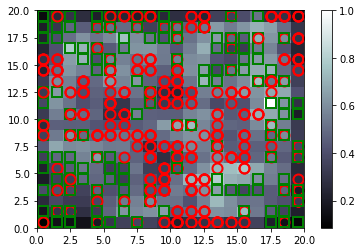

In [246]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

Lighter background tile = higher risk of fraud

Darker background tile = lower risk of fraud

Green Squares = Customers were approved.

Red Circles = Customer were not approved.

*Looks like there was an approved fraudulent customer grouping at (17, 11)*




## Finding the frauds
#### Automated with risk level parameter

In [247]:
fraud = som.distance_map()  
fraud_matrix = []       #stores grid locations of nodes deemed to be at risk for fraud
risk_level = 0.75       #threshold on how confident there was fraud

# iterate thru grid to find nodes that are above the risk threshold
for i in range(0, x_grid_size):
  for j in range(0, y_grid_size):
      if fraud[i][j] > risk_level:
        fraud_matrix.append((i,j))     #add grid location for fraudulent node as tuple


In [248]:
fraud_matrix    #grid locations for nodes that are above the risk threshold

[(2, 16), (13, 4), (15, 5), (16, 13), (17, 11)]

In [249]:
mappings = som.win_map(X)
frauds = []

for coord in fraud_matrix:
  temp = mappings[coord]      # get customer data entires for a node
  
# There may be a node that is deemed high risk but no customers are assigned to that node
# check that node is non-empty first
  if temp != []:                          
      temp_fraud_ids = sc.inverse_transform(temp)   # Get customer data in original format
      frauds.append(temp_fraud_ids[:,0])            # Store list of customer data at that node

print('Number of fraudulent nodes')
print(len(frauds))                              #number of non-empty nodes that have fraudulent customers

Number of fraudulent nodes
5


In [250]:
print('Number of Fraudulent Customer IDs')
num = 0
for i in range(0, len(frauds)):    #for each node
  for j in range(0, len(frauds[i])):   #for each customer id in node, increase counter
    num = num + 1
print(num)

Number of Fraudulent Customer IDs
7


In [251]:
print('Fraudulent Customer IDs')
fraudulent_customer_ids = []
for i in range(0,len(frauds)):    #for each node
  for j in range(0, len(frauds[i])):    #for each customer id in node, 
    fraudulent_customer_ids.append(int(frauds[i][j]))    #store customer id in list for future use
    print(int(frauds[i][j]))                        #print customer id

Fraudulent Customer IDs
15621423
15731989
15651460
15636454
15692137
15676909
15799785


In [252]:
print(fraudulent_customer_ids)

[15621423, 15731989, 15651460, 15636454, 15692137, 15676909, 15799785]


##Printing the Fraudulent Clients
#### -process requires user to manually insert fraudulent node locations
#### -limited to two nodes in current form

In [254]:
mappings1 = som.win_map(X)
node1 = (2,16)
node2 = (17,11)

frauds1 = np.concatenate((mappings1[node1], mappings1[node2]), axis = 0)
frauds1 = sc.inverse_transform(frauds1)

In [255]:
print('Fraud Customer IDs')
for i in frauds1[:, 0]:
  print(int(i))

Fraud Customer IDs
15621423
15799785
